In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from IPython.display import display
%matplotlib inline
mpl.rcParams['figure.figsize'] = (15, 6)

In [104]:
data1 = pd.read_csv("Anlage1.csv", sep=";", parse_dates=['timestamp'])
data1['indoor_target_temperature_celsius'].dtype

data = []
for i in range(5):
    data.append(pd.read_csv("Anlage"+str(i+1)+".csv", sep=";", parse_dates=['timestamp']))

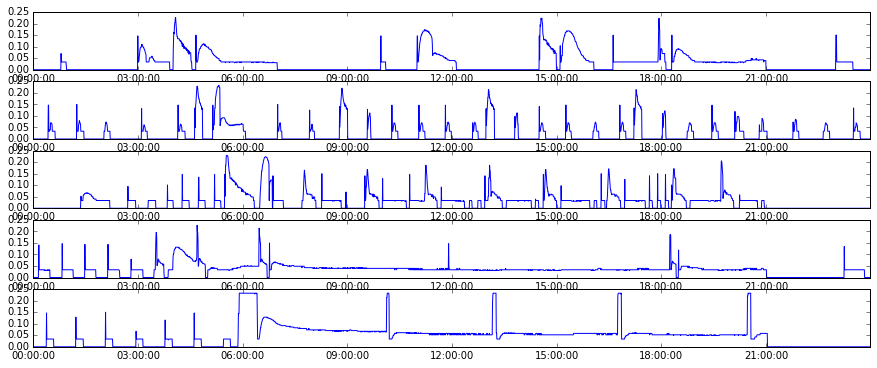

In [106]:
for i in range(5):
    mpl.subplot(5,1,i+1)
    mpl.plot(data[i]['timestamp'][:2880], data[i]['energy_consumption_kwh'][:2880])
mpl.show()

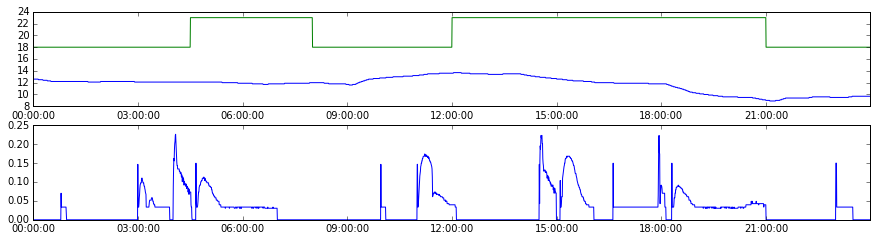

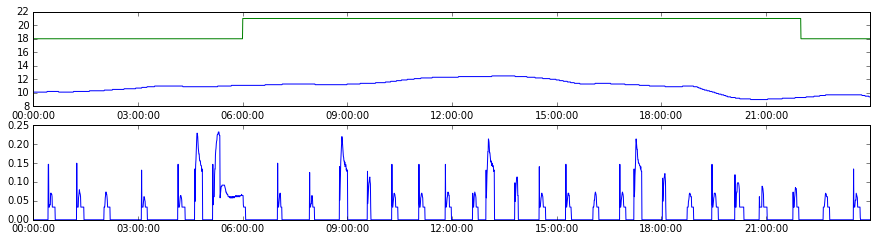

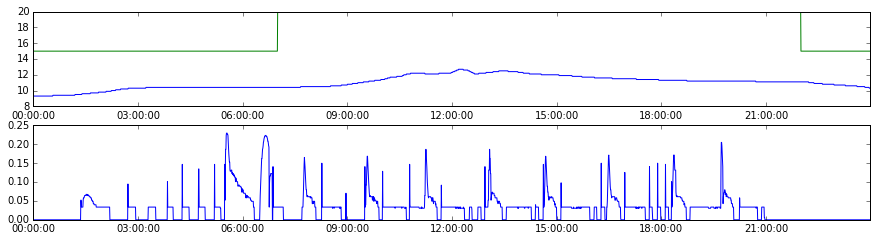

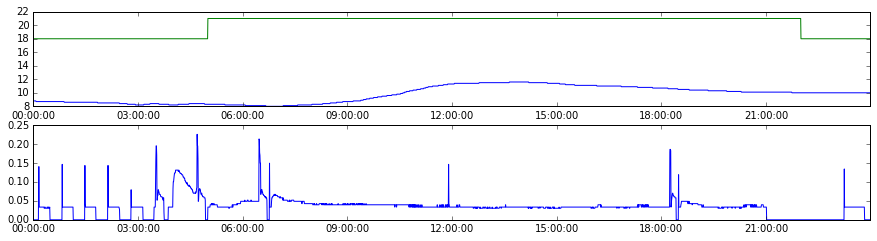

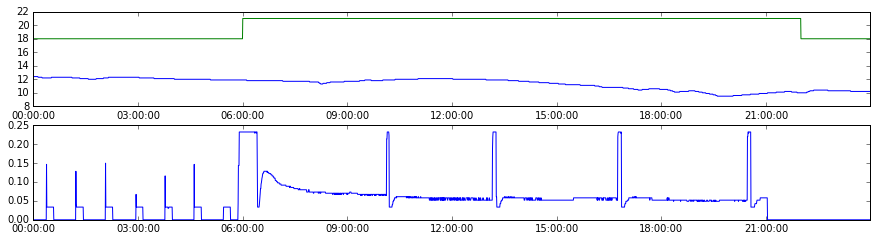

In [110]:
mpl.rcParams['figure.figsize'] = (15, 20)
for i in range(5):
    mpl.subplot(10,1,i*2+1)
    mpl.plot(data[i]['timestamp'][:2880], data[i]['outdoor_temperature_celsius'][:2880])
    mpl.plot(data[i]['timestamp'][:2880], data[i]['indoor_target_temperature_celsius'][:2880])
    mpl.subplot(10,1,i*2+2)
    mpl.plot(data[i]['timestamp'][:2880], data[i]['energy_consumption_kwh'][:2880])
    mpl.show()

In [112]:
for i in range(5):
    energy_days = data[i].as_matrix().reshape(-1,2880)
    energy_days = energy_days.sum(axis=0)
    energy_days[]
    mpl.subplot(10,1,i*2+1)
    mpl.plot(data[i]['timestamp'][:2880], energy_days[i]['outdoor_temperature_celsius'][:2880])
    mpl.plot(data[i]['timestamp'][:2880], data[i]['indoor_target_temperature_celsius'][:2880])
    mpl.subplot(10,1,i*2+2)
    mpl.plot(data[i]['timestamp'][:2880], data[i]['energy_consumption_kwh'][:2880])
    mpl.show()

In [100]:
energy_days = data1['energy_consumption_kwh'].reshape(-1,2880)
thing = np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(-1,3)

thing 
#december 18, 2015 is friday
energy_days_sum = energy_days.sum(axis=0)
energy_days_sum

array([ 1.01400943,  0.82159198,  0.82159198, ...,  0.81853774,
        0.81853774,  0.82770047])

In [101]:
num_weeks = np.floor(energy_days_sum.shape[0]/7).astype(int)
print(np.floor(num_weeks).astype(int))
num_missing_days = num_weeks*7-energy_days_sum.shape[0]
display(num_weeks)
#energy_sum_weekdays = np.pad(energy_days_sum, pad_width=(0,num_missing_days), mode='constant', constant_values=0)
energy_sum_weekdays = energy_days_sum[:num_weeks*7].reshape(-1,7)
display(energy_sum_weekdays)

energy_weekdays_sum = energy_sum_weekdays.sum(axis=0)
display(energy_weekdays_sum)

411


411

array([[ 1.01400943,  0.82159198,  0.82159198, ...,  0.83075472,
         0.82464623,  0.83075472],
       [ 0.79410377,  0.80632075,  0.95903302, ...,  0.78494104,
         0.94070755,  0.79715802],
       [ 0.80326651,  0.80326651,  0.83380896, ...,  0.94681604,
         0.83380896,  0.80632075],
       ..., 
       [ 1.06287736,  1.02622642,  0.79715802, ...,  0.80021226,
         0.79410377,  0.79410377],
       [ 0.92849057,  0.85824292,  0.98346698, ...,  0.94070755,
         0.82464623,  0.82464623],
       [ 0.82464623,  1.0659316 ,  0.89183962, ...,  0.92238208,
         0.81242925,  0.81548349]])

array([ 773.69967993,  772.78653623,  771.66086086,  772.02134003,
        776.52185418,  775.04511338,  775.51945153])